# Laboration deep learning AI21
## 0. EDA och filhantering

In [1]:
import os
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import shutil
from funktioner import *


### a och c

In [2]:
current_dir = os.path.abspath("")

# Byt namn på orginaldatan
try:
    os.rename("Ny  mapp", "original_data")
except FileNotFoundError:
    pass
    
path_original_train = "original_data\\train\\train\\"

# Skapa mappstruktur
paths = paths_data_folders(current_dir)
for path in paths:
    os.makedirs(path, exist_ok=True)


In [3]:
paths

['c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\train',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\val',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_small_data\\test',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\train',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\val',
 'c:\\Users\\ErikLarsson-AIU21GBG\\Documents\\GitHub\\Deep_learning\\Lab\\experiment_tiny_data\\test']

### b


In [4]:
original_data_train = np.array(os.listdir(path_original_train))
original_data_test = np.array(os.listdir(path_original_train))


In [5]:
urvalsbilder = original_data_train.copy()
rnd.seed(22) # random verkar föredra hundar 🙀
rnd.shuffle(urvalsbilder)

urvalsbilder

array(['cat.1490.jpg', 'cat.9336.jpg', 'dog.2110.jpg', ...,
       'cat.10693.jpg', 'cat.5903.jpg', 'cat.2888.jpg'], dtype='<U13')

In [6]:
def plot_urval(bilder, mapp):
        
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(20,15)

    for bild, ax in zip(bilder, axes.flatten()):
        
        label = bild[:3]

        path = os.path.join(mapp, bild)

        img = plt.imread(path)

        ax.imshow(img)
        ax.set_title(label)    
        ax.axis("off")


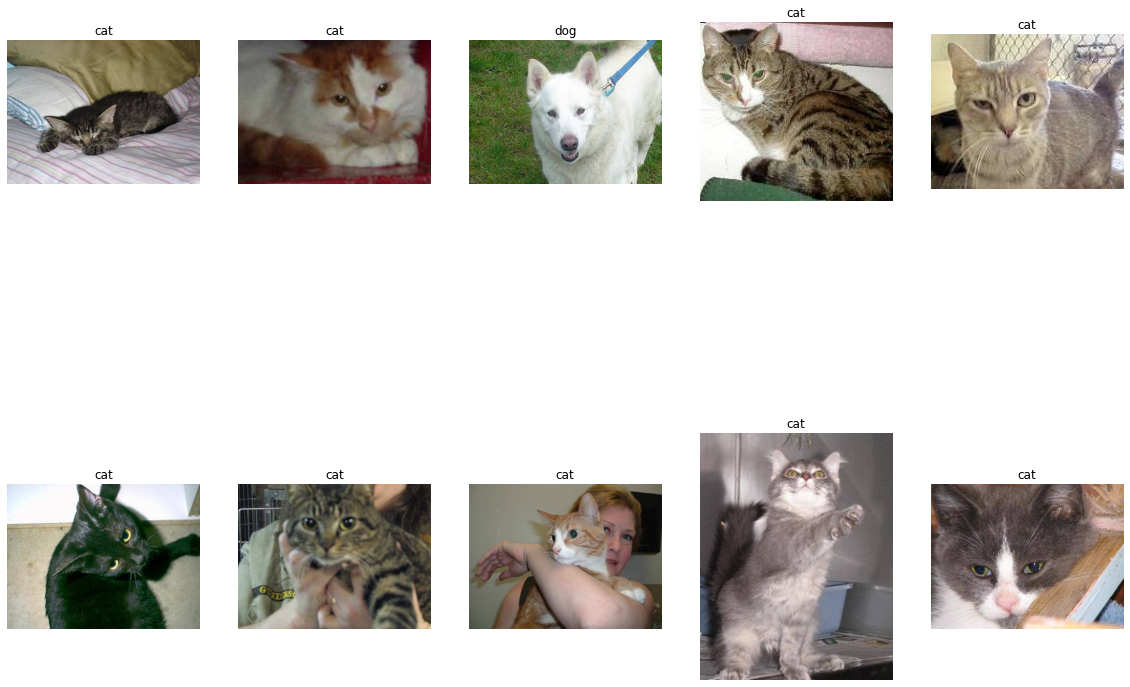

In [7]:
plot_urval(urvalsbilder, path_original_train)

### d

In [8]:
# Kontroll om några bilder har en annan etikett än katt eller hund
if sum([bild[:3] == "cat" or  bild[:3] == "dog" for bild in original_data_train]) == len(original_data_train):
    print("Alla etiketter är katt eller hund")
else:
    print("Det finns andra etiketter än hund och katt")



Alla etiketter är katt eller hund


In [9]:
# Sortera upp katter och byrackor 
idx_katter = np.where(etiketter(original_data_train) == "cat")[0]
idx_hundar = np.where(etiketter(original_data_train) == "dog")[0]

idx_katter, idx_hundar

(array([    0,     1,     2, ..., 12497, 12498, 12499], dtype=int64),
 array([12500, 12501, 12502, ..., 24997, 24998, 24999], dtype=int64))

In [10]:
katter = np.array(original_data_train)[idx_katter]
hundar = np.array(original_data_train)[idx_hundar]

# Blanda korten ifall det ligger i någon form av ordning från början 
rnd.shuffle(katter)
rnd.shuffle(hundar)


In [11]:
def plocka_bilder(från_idx, till_idx, mål_mapp):
    """Plockar bilder i ett intervall från hundar och katter och lägger dem i en mapp"""
    
    lista = np.concatenate((katter[från_idx : till_idx], hundar[från_idx : till_idx]))

    for bild in lista:
        bild_väg = os.path.join(path_original_train, bild)
        shutil.copy(bild_väg, mål_mapp)
        

In [12]:
# Välj ut antal bilder till varje kategori
antal_train = 1600
antal_val = 400
antal_test = 500

# Gränserna mellan de olika intervallen
gräns_1 =antal_train//2 
gräns_2 = gräns_1 + antal_val//2
gräns_3 = gräns_2 + antal_test//2

plocka_bilder(0, gräns_1, paths[0])    
plocka_bilder(gräns_1, gräns_2, paths[1])
plocka_bilder(gräns_2, gräns_3, paths[2])

### e

Väljer följande etiketter. Varför inses lätt.
- 0 🐶 
- 1 😻 


In [13]:
# Läser in bilderna i från mapparna och skapar x- och y-vektorer
x_train_small, x_val_small, x_test_small, y_train_small, y_val_small, y_test_small = read_images(paths[0:3])

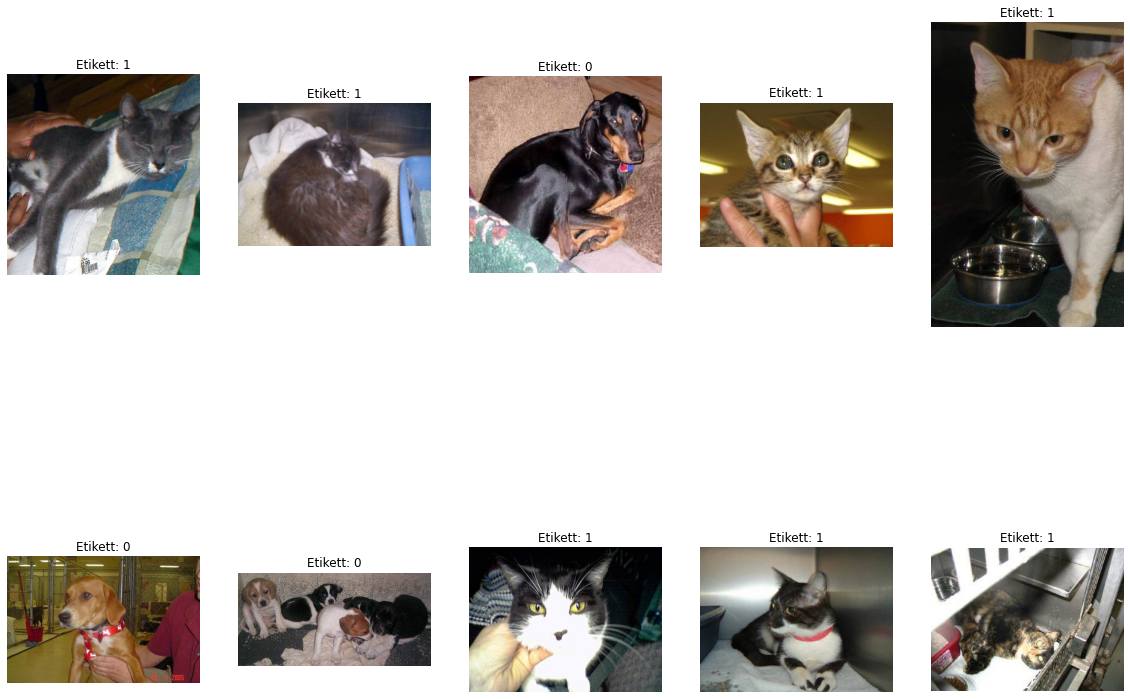

In [17]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(20,15)

for x, y, ax in zip(x_train_small, y_train_small, axes.flatten()):

    ax.imshow(x)
    ax.set_title(f"Etikett: {y}")    
    ax.axis("off")

Slumpade och rätt etikett. VSV


Text(0.5, 0.98, 'Cat vs Dogs')

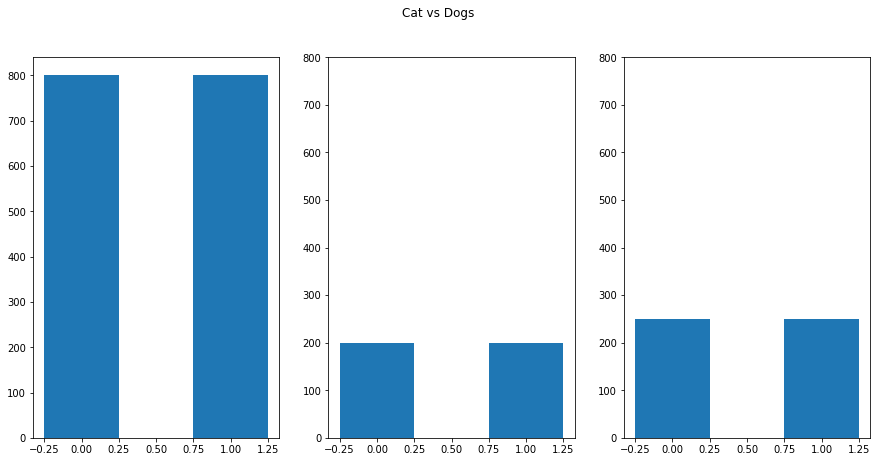

In [18]:
# Antal av varje sort i datasetten

fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,7)

axes[0].hist(y_train_small, bins= [0, 0.5, 1, 1.5], align="left")

axes[1].hist(y_val_small, bins= [0, 0.5, 1, 1.5], align="left")
axes[1].set_ylim(0, 800)
axes[2].hist(y_test_small, bins= [0, 0.5, 1, 1.5], align="left")
axes[2].set_ylim(0, 800)

fig.suptitle("Cat vs Dogs")

Lika många bilder märkta som katt och hund i alla dataset. VSV.

Alla bilder behöver inte ha rätt etikett från början dock.